
refer this xgb complete implementation: https://youtu.be/GrJP9FLV3FE?si=PcCTJercNzWu3oyU

Steps: For steps refer and document the series
1)	https://www.youtube.com/watch?v=3CC4N4z3GJc
2)	https://www.youtube.com/watch?v=OtD8wVaFm6E&t=16s
3)	https://www.youtube.com/watch?v=gPciUPwWJQQ&t=309s


Feature Engineering: fever = high temp + chills

In [ ]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

RANDOM_STATE = 55 ## We will pass it to every sklearn call so we ensure reproducibility

In [ ]:
df_symptoms = pd.read_csv('/content/Symptom-severity.csv')
df_symptoms

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
...,...,...
128,inflammatory_nails,2
129,blister,4
130,red_sore_around_nose,2
131,yellow_crust_ooze,3


In [ ]:
df = pd.read_csv('/content/dataset.csv')

In [ ]:
df.shape

(4920, 18)

In [ ]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
symp = df.columns
symp = symp[1:]
symp

Index(['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
       'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
       'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15',
       'Symptom_16', 'Symptom_17'],
      dtype='object')

In [ ]:
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [ ]:
for i in df_symptoms['Symptom']:
    df[i] = np.array([0 for l in range(df.shape[0])])

<ipython-input-8-26e5b5d25bd5>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = np.array([0 for l in range(df.shape[0])])
<ipython-input-8-26e5b5d25bd5>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = np.array([0 for l in range(df.shape[0])])
<ipython-input-8-26e5b5d25bd5>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

In [ ]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.fillna('None', inplace=True)

In [ ]:
df.replace(' spotting_ urination', 'spotting_urination', inplace=True)
df.replace(' dischromic _patches', 'dischromic_patches', inplace=True)

In [ ]:
for i in range(df.shape[0]):
    for j in symp:
        s = df[j].iloc[i].lstrip().rstrip()
        if s in df.columns:
            df[s].iloc[i] = 1

df.head()

<ipython-input-12-c1dcce86405c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[s].iloc[i] = 1


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic_patches,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic_patches,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic_patches,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print('dischromic_patches' in df.columns)


True


In [ ]:
df['Symptom_4'].iloc[0]

'dischromic_patches'

In [ ]:
df['dischromic_patches'].iloc[0]

1

In [ ]:
df.drop(columns=[s for s in symp], inplace=True)
df.head()

,Disease,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,Fungal infection,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
features = df[[x for x in df.columns if x != 'Disease']]
print(features.shape)
features.head()

(4920, 132)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
noise_level = 0.1  # Adjust this value as needed

# Add random noise to the DataFrame
features = features.applymap(lambda x: x if np.random.rand() > noise_level else 1 - x)


In [ ]:
l = LabelEncoder()
target = l.fit_transform(df['Disease'])

In [ ]:
# Fit and transform the original labels
encoded_labels = l.fit_transform(df['Disease'])

# Display the correspondence between original labels and encoded labels
label_mapping = dict(zip(l.classes_, range(len(l.classes_))))

# Swap keys and values using a dictionary comprehension
label_mapping = {value: key for key, value in label_mapping.items()}


print("Label Mapping:")
print(label_mapping)


Label Mapping:
{0: '(vertigo) Paroymsal  Positional Vertigo', 1: 'AIDS', 2: 'Acne', 3: 'Alcoholic hepatitis', 4: 'Allergy', 5: 'Arthritis', 6: 'Bronchial Asthma', 7: 'Cervical spondylosis', 8: 'Chicken pox', 9: 'Chronic cholestasis', 10: 'Common Cold', 11: 'Dengue', 12: 'Diabetes ', 13: 'Dimorphic hemmorhoids(piles)', 14: 'Drug Reaction', 15: 'Fungal infection', 16: 'GERD', 17: 'Gastroenteritis', 18: 'Heart attack', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 23: 'Hypertension ', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 26: 'Hypothyroidism', 27: 'Impetigo', 28: 'Jaundice', 29: 'Malaria', 30: 'Migraine', 31: 'Osteoarthristis', 32: 'Paralysis (brain hemorrhage)', 33: 'Peptic ulcer diseae', 34: 'Pneumonia', 35: 'Psoriasis', 36: 'Tuberculosis', 37: 'Typhoid', 38: 'Urinary tract infection', 39: 'Varicose veins', 40: 'hepatitis A'}


In [ ]:
target = pd.DataFrame(target)
target

,0
0,15
1,15
2,15
3,15
4,15
...,...
4915,0
4916,2
4917,38
4918,35


# **DECISION TREE CLASSIFIER**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.8, random_state = RANDOM_STATE)


In [ ]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_test)}')

train samples: 3936
validation samples: 984


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
help(DecisionTreeClassifier())

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to

In [ ]:
min_samples_split_list = [2, 3, 4, 8, 16, 32, 64] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.
min_samples_leaf_list = [1,2, 3, 4, 8, 16, 32, 64]
min_impurity_decrease_list = [0.0001, 0.001, 0.003, 0.01, 0.03, 0.1]

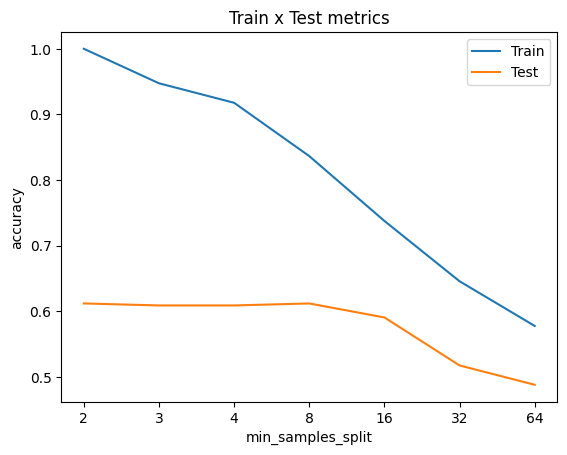

In [ ]:
accuracy_list_train = []
accuracy_list_test = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split, random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

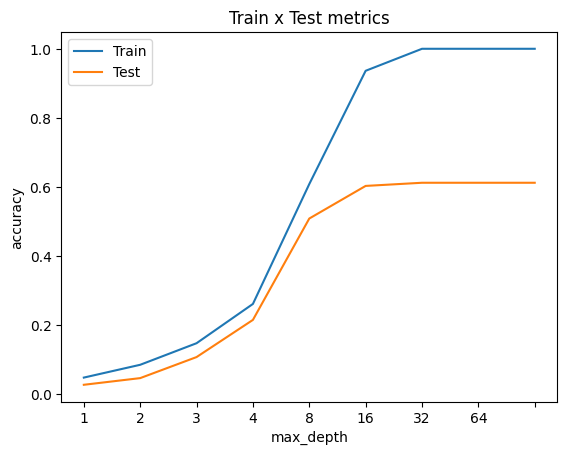

In [ ]:
accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

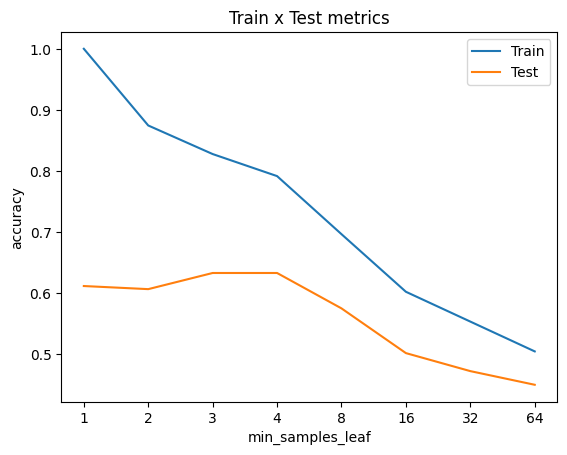

In [ ]:
accuracy_list_train = []
accuracy_list_test = []
for min_samples_leaf in min_samples_leaf_list:    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_leaf = min_samples_leaf, random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_leaf_list )),labels=min_samples_leaf_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

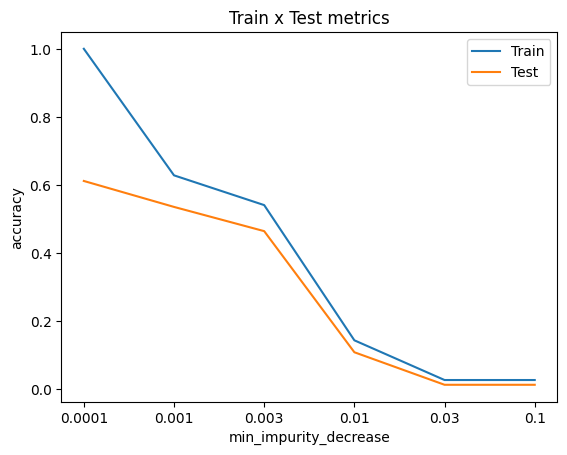

In [ ]:
accuracy_list_train = []
accuracy_list_test = []
for min_impurity_decrease in min_impurity_decrease_list:    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    #print(min_impurity_decrease)
    model = DecisionTreeClassifier(min_impurity_decrease = min_impurity_decrease, random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('min_impurity_decrease')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_impurity_decrease_list )),labels=min_impurity_decrease_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

In [ ]:
model = DecisionTreeClassifier(criterion = "gini" , min_samples_split = 16,
                               max_depth = 16, min_samples_leaf =  4,
                               min_impurity_decrease = 0.003, random_state=RANDOM_STATE)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=16, min_impurity_decrease=0.003,
                       min_samples_leaf=4, min_samples_split=16,
                       random_state=55)

In [ ]:
print(accuracy_score(model.predict(X_train), y_train))
print(accuracy_score(model.predict(X_test), y_test))

0.5409044715447154
0.4644308943089431


In [ ]:
feature_names = X_train.columns

# Create a DataFrame to display feature importances with corresponding names
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': model.feature_importances_
})

In [ ]:
feature_importance_df

,Feature,Importance
0,itching,0.000000
1,skin_rash,0.022525
2,nodal_skin_eruptions,0.000000
3,continuous_sneezing,0.000000
4,shivering,0.000000
...,...,...
127,inflammatory_nails,0.000000
128,blister,0.000000
129,red_sore_around_nose,0.000000
130,yellow_crust_ooze,0.015492


# **Random Forest**

Now let's try the Random Forest algorithm also, using the Scikit-learn implementation.

All of the hyperparameters found in the decision tree model will also exist in this algorithm, since a random forest is an ensemble of many Decision Trees.
One additional hyperparameter for Random Forest is called n_estimators which is the number of Decision Trees that make up the Random Forest.
Remember that for a Random Forest, we randomly choose a subset of the features AND randomly choose a subset of the training examples to train each individual tree.

Following the lectures, if  𝑛
  is the number of features, we will randomly select  √n
  of these features to train each individual tree.
Note that you can modify this by setting the max_features parameter.
You can also speed up your training jobs with another parameter, n_jobs.

Since the fitting of each tree is independent of each other, it is possible fit more than one tree in parallel.
So setting n_jobs higher will increase how many CPU cores it will use. Note that the numbers very close to the maximum cores of your CPU may impact on the overall performance of your PC and even lead to freezes.
Changing this parameter does not impact on the final result but can reduce the training time.
We will run the same script again, but with another parameter, n_estimators, where we will choose between 10, 50, and 100. The default is 100.

In [ ]:
max_features_list = list(map(int, [132**(1/4), 132**(1/3), 132**(1/2), 132**(3/5), 132**(7/10), 132**(8/10)]))
n_estimators_list = [1,2,4,8,16,32,64,128]


<ipython-input-35-b7f16d094b0b>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_state=RANDOM_STATE).fit(X_train,y_train)
<ipython-input-35-b7f16d094b0b>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_state=RANDOM_STATE).fit(X_train,y_train)
<ipython-input-35-b7f16d094b0b>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_state=RANDOM_STATE).fit(X_train,y_train)
<ipython-input-35-b7f16d094b0b>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_state=RANDOM_STATE).fit(X_train,y_train)
<ipython-input-35-b7f16d094b0b>:6: DataC

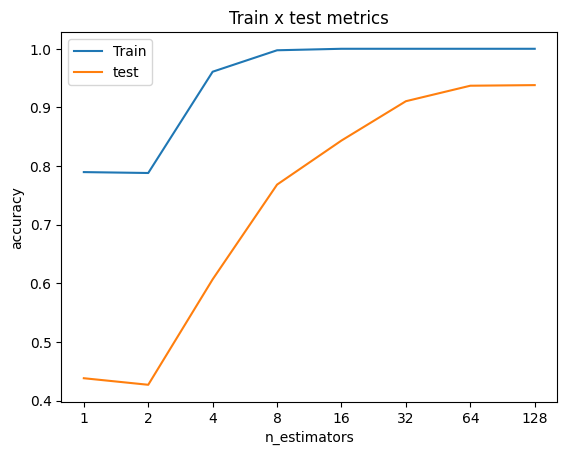

In [ ]:
accuracy_list_train = []
accuracy_list_test = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state=RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x test metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','test'])

<ipython-input-36-22d92fb1abd0>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_state=RANDOM_STATE).fit(X_train,y_train)
<ipython-input-36-22d92fb1abd0>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_state=RANDOM_STATE).fit(X_train,y_train)
<ipython-input-36-22d92fb1abd0>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_state=RANDOM_STATE).fit(X_train,y_train)
<ipython-input-36-22d92fb1abd0>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_state=RANDOM_STATE).fit(X_train,y_train)
<ipython-input-36-22d92fb1abd0>:7: DataC

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9105691056910569, 0.9197154471544715, 0.9369918699186992, 0.9390243902439024, 0.9288617886178862, 0.9258130081300813]


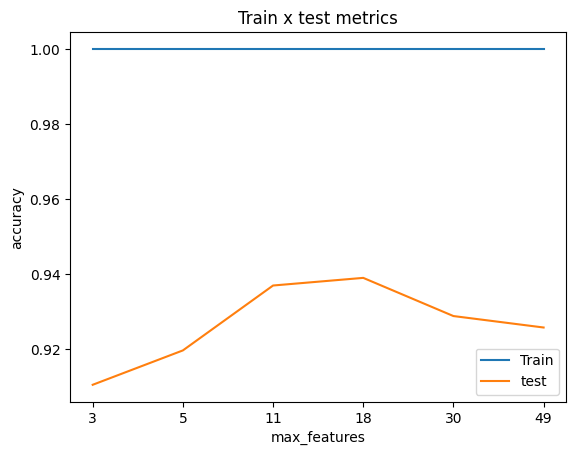

In [ ]:


accuracy_list_train = []
accuracy_list_test = []
for max_features in max_features_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = 64,
                                   max_features = max_features,
                                   random_state=RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

print(accuracy_list_train)
print(accuracy_list_test)

plt.title('Train x test metrics')
plt.xlabel('max_features')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_features_list )),labels=max_features_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','test'])

In [ ]:
model = RandomForestClassifier(n_estimators = 64,
                               max_features = 18,
                               criterion = "gini",
                               min_samples_split = 16,
                               max_depth = 16,
                               min_samples_leaf =  4,
                               min_impurity_decrease = 0.003,
                               random_state=RANDOM_STATE)
model.fit(X_train,y_train)
predictions_train = model.predict(X_train) ## The predicted values for the train dataset
predictions_test = model.predict(X_test) ## The predicted values for the test dataset
accuracy_train = accuracy_score(predictions_train,y_train)
accuracy_test = accuracy_score(predictions_test,y_test)

print(accuracy_train)
print(accuracy_test)

# # 'n_estimators': 128,
#  'min_samples_split': 8,
#  'min_samples_leaf': 3,
#  'min_impurity_decrease': 0.001,
#  'max_features': 5,
#  'max_depth': None

<ipython-input-37-9826bd069255>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


0.9181910569105691
0.899390243902439


In [ ]:
print(accuracy_score(model.predict(X_train), y_train))
print(accuracy_score(model.predict(X_test), y_test))

0.9181910569105691
0.899390243902439


**Note that we are searching for the best value one hyperparameter while leaving the other hyperparameters at their default values.**

Ideally, we would want to check every combination of values for every hyperparameter that we are tuning.
If we have 3 hyperparameters, and each hyperparameter has 4 values to try out, we should have a total of 4 x 4 x 4 = 64 combinations to try.
When we only modify one hyperparameter while leaving the rest as their default value, we are trying 4 + 4 + 4 = 12 results.
To try out all combinations, we can use a sklearn implementation called GridSearchCV. GridSearchCV has a refit parameter that will automatically refit a model on the best combination so we will not need to program it explicitly. For more on GridSearchCV, please refer to its documentation.

In [ ]:
random_models = RandomizedSearchCV(estimator = RandomForestClassifier(),
                                param_distributions = {
                                    'min_samples_split' : [2, 3, 4, 8, 16, 32, 64], ## If the number is an integer, then it is the actual quantity of samples,
                                    'max_depth' : [1,2, 3, 4, 8, 16, 32, 64, None], # None means that there is no depth limit.
                                    'min_samples_leaf' : [1,2, 3, 4, 8, 16, 32, 64],
                                    'min_impurity_decrease' : [0.0001, 0.001, 0.003, 0.01, 0.03, 0.1],
                                    'max_features' : list(map(int, [132**(1/4), 132**(1/3), 132**(1/2), 132**(3/5), 132**(7/10)])),
                                    'n_estimators' : [1,2,4,8,16,32,64,128]
                                },
                                n_iter = 100,
                                cv = 4,
                                verbose = 0,
                                #random_state = RANDOM_STATE,
                                scoring = make_scorer(f1_score, average='micro') # 'accuracy' #'roc_auc'?

)

In [ ]:
random_models.fit(X_train, y_train)
random_models.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

{'n_estimators': 128,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.001,
 'max_features': 11,
 'max_depth': None}

In [ ]:
best_params = random_models.best_params_

# Access the scores corresponding to the best parameters
best_scores = random_models.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_scores)

Best Parameters: {'n_estimators': 128, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_features': 11, 'max_depth': None}
Best Cross-Validation Score: 0.9324186991869918


# **XGBClassifier**

> Indented block



In [ ]:
help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, XGBClassifierMixIn, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  See :doc:`/python/sklearn_estimator` for more information.
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : Optional[int]
 |          Number of boosting rounds.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      max_leaves :
 |          Maximum number of leaves; 0 indicates no limit.
 |      max_bin :
 |          If using histogram-based algorithm, maximum number of bins per feature
 |      grow_policy :
 |          Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
 |          depth-wise. 1: favor splitting at n

XGBoost (Extreme Gradient Boosting) is a powerful and flexible machine learning library for gradient boosting. It provides a wide range of parameters that you can tune to optimize the performance of your model. Here are some common parameters for the XGBClassifier in XGBoost:
* Booster Parameters:
    * learning_rate (float): Step size shrinkage used in update to prevent overfitting. Range: [0, 1].
    * n_estimators (int): Number of boosting rounds or trees to build.
    * subsample (float): Subsample ratio of the training instances. Range: (0, 1].
    * colsample_bytree (float): Subsample ratio of columns when constructing each tree. Range: (0, 1].
    * colsample_bylevel (float): Subsample ratio of columns for each level in the tree. Range: (0, 1].
    * gamma (float): Minimum loss reduction required to make a further partition on a leaf node. Controls regularization.
    * reg_alpha (float): L1 regularization term on weights.
    * reg_lambda (float): L2 regularization term on weights.
* Tree-Specific Parameters:
    * max_depth (int): Maximum depth of a tree.
    * min_child_weight (float): Minimum sum of instance weight (hessian) needed in a child.
    * max_delta_step (int): Maximum delta step we allow each tree’s weight estimation to be.
    * subsample (float): Subsample ratio of the training instances. Range: (0, 1].
* Objective Parameters:
    * objective (string): Specifies the learning task and the corresponding objective function. For multiclass classification, use 'multi:softmax' or 'multi:softprob'.
* Evaluation Parameters:
    * eval_metric (string or list of strings): Evaluation metrics for validation data.
    * early_stopping_rounds (int): Activates early stopping. The model will stop training if the validation metric does not improve after a given number of rounds.
* Miscellaneous Parameters:
    * random_state (int): Seed for random number generation.


**The boosting methods train several trees, but instead of them being uncorrelated to each other, now the trees are fit one after the other in order to minimize the error.
The model has the same parameters as a decision tree, plus the learning rate.**

* The learning rate is the size of the step on the Gradient Descent method that the XGBoost uses internally to minimize the error on each train step.
One interesting thing about the XGBoost is that during fitting, it can take in an evaluation dataset of the form (X_val,y_val).
* On each iteration, it measures the cost (or evaluation metric) on the evaluation datasets.
* Once the cost (or metric) stops decreasing for a number of rounds (called early_stopping_rounds), the training will stop.
* More iterations lead to more estimators, and more estimators can result in overfitting.
* By stopping once the validation metric no longer improves, we can limit the number of estimators created, and reduce overfitting.


We can then set a large number of estimators, because we can stop if the cost function stops decreasing.

### Note some of the .fit() parameters: **bold text**
* eval_set = [(X_train_eval,y_train_eval)]:Here we must pass a list to the eval_set, because you can have several different tuples ov eval sets.
* early_stopping_rounds: This parameter helps to stop the model training if its evaluation metric is no longer improving on the validation set. It's set to 10.
    * The model keeps track of the round with the best performance (lowest evaluation metric). For example, let's say round 16 has the lowest evaluation metric so far.
    * Each successive round's evaluation metric is compared to the best metric. If the model goes 10 rounds where none have a better metric than the best one, then the model stops training.
    * The model is returned at its last state when training terminated, not its state during the best round. For example, if the model stops at round 26, but the best round was 16, the model's training state at round 26 is returned, not round 16.
    * Note that this is different from returning the model's "best" state (from when the evaluation metric was the lowest).


In [ ]:
n = int(len(X_train)*0.8) ## Let's use 80% to train and 20% to eval
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [ ]:

xgb_model = XGBClassifier(n_estimators = 500, max_depth = 16, learning_rate = 0.1, verbosity = 0, subsample = 0.8, objective='multi:softprob', random_state = RANDOM_STATE)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)], early_stopping_rounds = 10)


[0]	validation_0-mlogloss:2.92137


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-mlogloss:2.53112
[2]	validation_0-mlogloss:2.26025
[3]	validation_0-mlogloss:2.05578
[4]	validation_0-mlogloss:1.88559
[5]	validation_0-mlogloss:1.74859
[6]	validation_0-mlogloss:1.62585
[7]	validation_0-mlogloss:1.51654
[8]	validation_0-mlogloss:1.41935
[9]	validation_0-mlogloss:1.33621
[10]	validation_0-mlogloss:1.26154
[11]	validation_0-mlogloss:1.19386
[12]	validation_0-mlogloss:1.13149
[13]	validation_0-mlogloss:1.07449
[14]	validation_0-mlogloss:1.02302
[15]	validation_0-mlogloss:0.97620
[16]	validation_0-mlogloss:0.93256
[17]	validation_0-mlogloss:0.88941
[18]	validation_0-mlogloss:0.85002
[19]	validation_0-mlogloss:0.81641
[20]	validation_0-mlogloss:0.78426
[21]	validation_0-mlogloss:0.75461
[22]	validation_0-mlogloss:0.72624
[23]	validation_0-mlogloss:0.69758
[24]	validation_0-mlogloss:0.67598
[25]	validation_0-mlogloss:0.65269
[26]	validation_0-mlogloss:0.63135
[27]	validation_0-mlogloss:0.61077
[28]	validation_0-mlogloss:0.59270
[29]	validation_0-mlogloss:0.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
accuracy_score(xgb_model.predict(X_train),y_train)

0.9860264227642277

In [ ]:
accuracy_score(xgb_model.predict(X_test),y_test)

0.9522357723577236

In [ ]:
y_train['pred'] = xgb_model.predict(X_train)

In [ ]:
train_result = y_train
y_train.drop('pred', axis=1)
train_result.rename(columns={0: 'actual'}, inplace=True)
train_result

,actual,pred
3853,27,27
4521,30,30
3935,27,27
3819,1,1
3576,6,6
...,...,...
2021,38,38
968,28,28
4391,14,14
4762,1,1


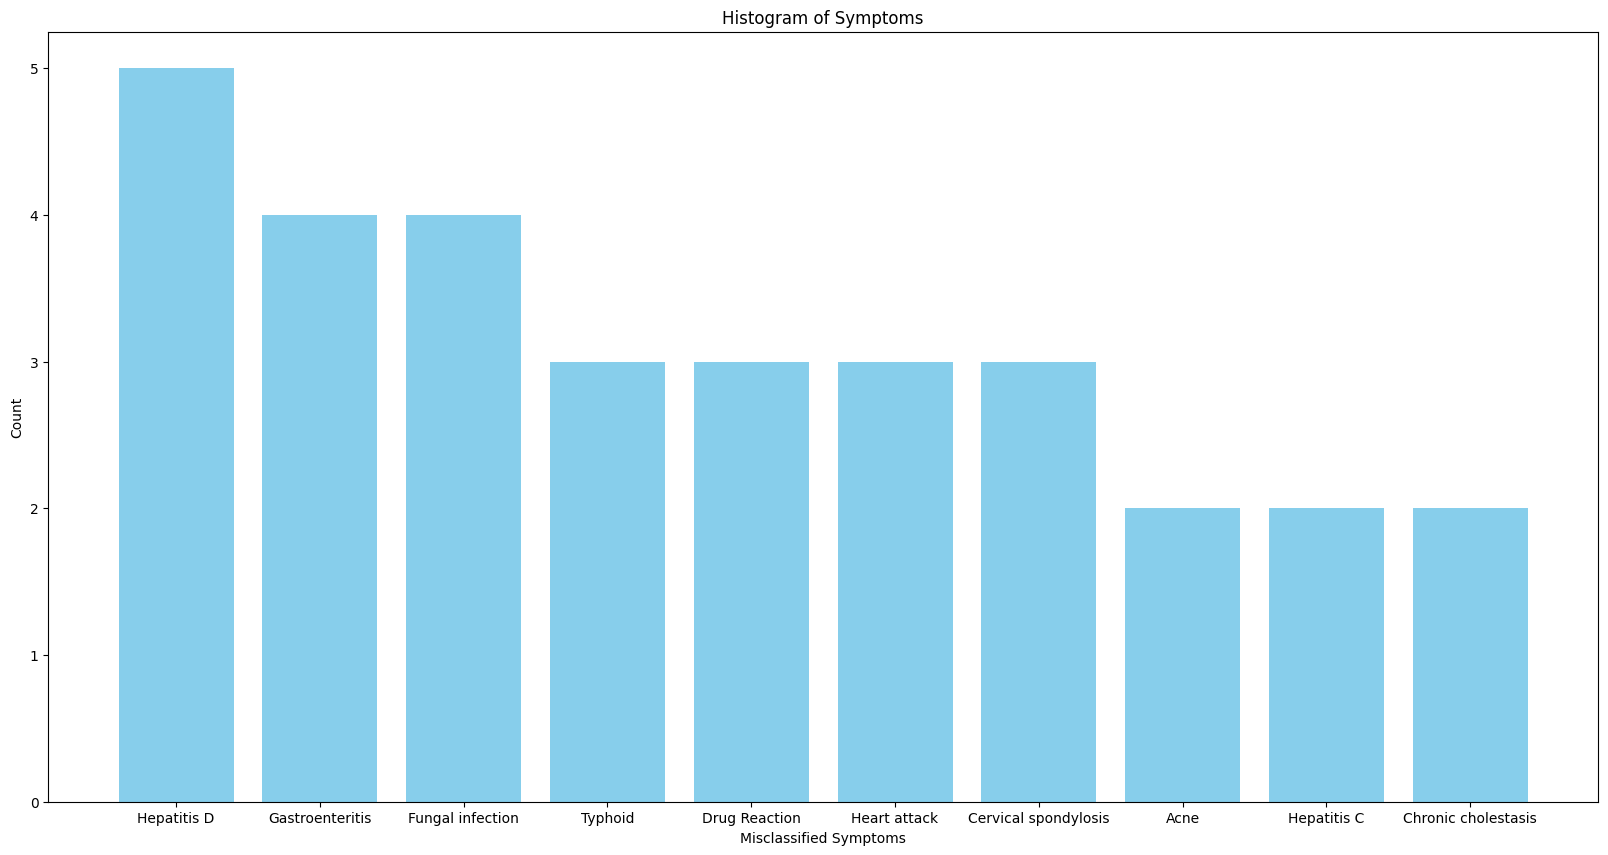

In [ ]:
symp_mismatch = pd.DataFrame(train_result[train_result['actual'] != train_result['pred']]['actual'].value_counts())
a=[]
b=[]
for i in symp_mismatch.index:
    a.append(label_mapping[i])
    b.append(symp_mismatch.loc[i, 'actual'])

plt.figure(figsize=(20, 10))

# Create a simple histogram
plt.bar(a[0:10], b[0:10], color='skyblue')

# Add labels and title
plt.xlabel('Misclassified Symptoms')
plt.ylabel('Count')
plt.title('Histogram of Symptoms')

# Show the plot
plt.show()


In [ ]:

y_test['pred'] = xgb_model.predict(X_test)

test_result = y_test
y_test.drop('pred', axis=1)
test_result.rename(columns={0: 'actual'}, inplace=True)
test_result

,actual,pred
1565,25,25
4519,6,6
2866,2,2
2620,2,2
1618,38,38
...,...,...
2921,23,23
4331,10,10
1314,17,17
2848,40,21


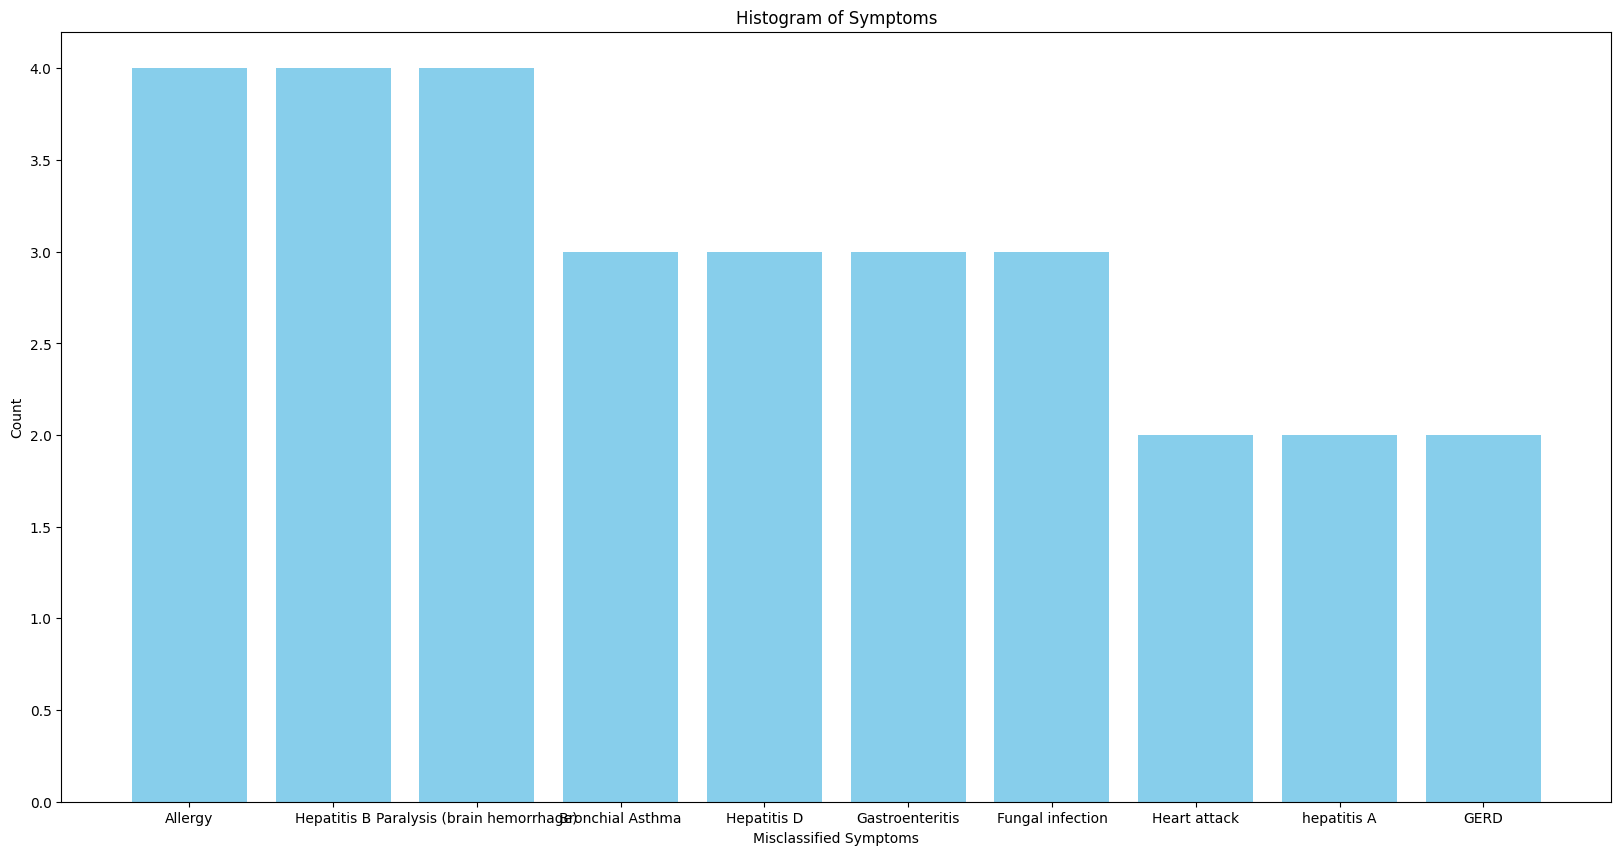

In [ ]:
symp_mismatch = pd.DataFrame(test_result[test_result['actual'] != test_result['pred']]['actual'].value_counts())
a=[]
b=[]
for i in symp_mismatch.index:
    a.append(label_mapping[i])
    b.append(symp_mismatch.loc[i, 'actual'])

plt.figure(figsize=(20, 10))

# Create a simple histogram
plt.bar(a[0:10], b[0:10], color='skyblue')

# Add labels and title
plt.xlabel('Misclassified Symptoms')
plt.ylabel('Count')
plt.title('Histogram of Symptoms')

# Show the plot
plt.show()


In [ ]:
def apple():
    a = []
    for i in range(100000000):
        a.append(i)


In [ ]:
import cProfile

# ... your machine learning model code ...

# Profile the code
cProfile.run("apple()")


         100000004 function calls in 35.552 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1   24.984   24.984   34.276   34.276 <ipython-input-125-8f5e7eaf3b2c>:1(apple)
        1    1.276    1.276   35.552   35.552 <string>:1(<module>)
        1    0.000    0.000   35.552   35.552 {built-in method builtins.exec}
100000000    9.292    0.000    9.292    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [ ]:
import psutil

# Get memory usage
memory_usage = psutil.virtual_memory()
print(f"Memory Usage: {memory_usage}")


Memory Usage: svmem(total=13609451520, available=11551371264, percent=15.1, used=1733185536, free=8402526208, active=648282112, inactive=4299837440, buffers=347856896, cached=3125882880, shared=24141824, slab=145911808)
